# CubePlusPlus Pipeline Profiling Analysis with Compression

### Prerequisites

None. Exemplary logs are loaded by default. Experiments were run on:

* Storage: CEPH HDD
* CPU: Intel Xeon E5-2630 v3 8x@2.4GHz
* Image: ubuntu-18.04-lts/Openstack
* Memory: 80GB DDR4


In [1]:
full_dataset_samplecount = 4890
for sample_size in [500, 1000, 2000, 4000]:
    print(f"{sample_size} of total: {round(sample_size / full_dataset_samplecount * 100, 2)}%")

500 of total: 10.22%
1000 of total: 20.45%
2000 of total: 40.9%
4000 of total: 81.8%


In [2]:
%load_ext autoreload
%autoreload 2
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import ticker
from typing import List
# adding previous directory for easier use of library
import sys
sys.path.append('../')
from notebookhelper import show_values_on_bars, show_values_on_catplot, save_figure, make_big_number_prettier

from presto.analysis import StrategyAnalysis \
                       , strat_analysis_from_csv

pd.set_option('display.max_rows', 200)
plotting_context = "paper"
default_palette = "colorblind"
epoch_palette = sns.color_palette("YlOrRd", 3)
samples_palette = sns.color_palette("icefire", 15)
threads_palette = sns.color_palette("tab20", 4)
compression_palette = sns.color_palette("Spectral",3)
font_scale = 1.4
sns.set(font_scale=font_scale, context=plotting_context)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

In [3]:
local_fig_dir = "cubeplusplus-png-pipeline"

def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

home_path = "../logs/final-logs/cubeplusplus/png/compression"
path_to_cum_df = f"{home_path}/cubeplusplus-png-compression-GZIP-none-ZLIB-storage-ceph-hdd_2021-09-30-01:07:20_cum-df_samples-4890_threads-8.csv"
path_to_cum_dstat_df = f"{home_path}/cubeplusplus-png-compression-GZIP-none-ZLIB-storage-ceph-hdd_2021-09-30-01:07:20_cum-dstat-df_samples-4890_threads-8.csv"
sampling_tag = ""

analysis = strat_analysis_from_csv(path_to_cum_dstat_df = path_to_cum_dstat_df
                                   , path_to_cum_df = path_to_cum_df)
cum_dstat_df = analysis.to_cum_dstat_df()
cum_df       = analysis.to_cum_df()
# need to sort the strategies for some reason as they are not ascending
cum_df = cum_df.sort_values(by='split_name')
strategies   = list(cum_df.split_name.unique())
strategies_renamed = ["concatenated", "decoded", "resized", "pixel-\ncentered"]
print(strategies)

['2-read-image', '3-decode-image', '4-resize-image', '5-center-pixel-values']


In [4]:
cum_df

,offline_processing_and_save_time_s,shard_count,thread_count,shard_cum_size_MB,sample_count,online_processing_time_s,throughput_sps,runs_count,runs_total,ueid,split_name,creation_timestamp,compression_type,storage_type
0,2971.010010,8,8,86975.398438,4890,280.788330,17.415255,0,1,df1645,2-read-image,2021-09-30-01:07:20,GZIP,ceph-hdd
20,310.901154,8,8,87215.359375,4890,224.157715,21.814999,0,1,7d9ab8,2-read-image,2021-09-29-22:00:59,none,ceph-hdd
28,288.545929,8,8,87215.359375,4890,221.750473,22.051813,0,1,35cb7f,2-read-image,2021-09-30-09:16:02,none,ceph-hdd
32,291.585876,8,8,87215.359375,4890,225.046875,21.728807,0,1,320cae,2-read-image,2021-09-30-14:47:39,none,ceph-hdd
16,2800.824707,8,8,86975.398438,4890,284.304749,17.199852,0,1,07cc29,2-read-image,2021-09-30-23:19:01,GZIP,ceph-hdd
36,295.850800,8,8,87215.359375,4890,223.698654,21.859766,0,1,fc19c6,2-read-image,2021-09-30-20:19:03,none,ceph-hdd
40,2871.824951,8,8,86975.398438,4890,274.779907,17.796062,0,1,24f491,2-read-image,2021-09-29-22:29:53,ZLIB,ceph-hdd
12,2806.873291,8,8,86975.382812,4890,280.051300,17.461086,0,1,128c6e,2-read-image,2021-09-30-17:47:10,GZIP,ceph-hdd
44,2802.284912,8,8,86975.367188,4890,274.696533,17.801462,0,1,69cf2a,2-read-image,2021-09-30-04:09:40,ZLIB,ceph-hdd
24,289.568756,8,8,87215.359375,4890,222.502716,21.977261,0,1,74638b,2-read-image,2021-09-30-03:41:54,none,ceph-hdd


In [5]:
cum_dstat_df.head(5)

,rel_time_s,disk_read_mbs,disk_write_mbs,net_read_mbs,net_write_mbs,run,sample_count,shard_count,thread_count,ueid,...,vm_allocated_mb,vm_free_mb,filesystem_files,filesystem_inodes,filelocks_posix,filelocks_lock,filelocks_read,filelocks_write,compression_type,storage_type
0,0.0,0.042929,0.194387,0.000000,0.000000,0,4890,8,8,df1645,...,0.02,0.02,1280.0,13959.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
1,1.0,9.371648,0.000000,167.864624,0.318564,0,4890,8,8,df1645,...,0.29,0.10,1280.0,13988.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
2,2.0,0.065536,0.000000,12.545195,0.032116,0,4890,8,8,df1645,...,0.10,0.05,1280.0,13989.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
3,3.0,0.000000,0.000000,24.240200,0.052149,0,4890,8,8,df1645,...,0.05,0.03,1280.0,13991.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd
4,4.0,0.000000,0.000000,34.942440,0.076711,0,4890,8,8,df1645,...,0.04,0.02,1280.0,13994.0,3.0,2.0,0.0,5.0,GZIP,ceph-hdd


## 0. Experiment Information

### 0.1 Experiment Count

We want to profile each strategy with each compression at least 5 times. 

In [6]:
experiment_count_dict = {
    "split_name": []
  , "compression_type": []
  , "count": []
}

def get_experiment_count(df):
    '''Short helper'''
    return len(df.index)

def add_to_dict(split_name, compression_type, count):
    '''Short helper'''
    experiment_count_dict["split_name"] += [split_name]
    experiment_count_dict["compression_type"] += [compression_type]
    experiment_count_dict["count"] += [count]

for split_name in cum_df["split_name"].unique():
    for compression in cum_df["compression_type"].unique():
        experiment_count = get_experiment_count(cum_df.query(f"split_name=='{split_name}' and compression_type=='{compression}'"))
        add_to_dict(split_name, compression, experiment_count)
        
experiment_count_df = pd.DataFrame.from_dict(experiment_count_dict)
experiment_count_df

,split_name,compression_type,count
0,2-read-image,GZIP,5
1,2-read-image,none,5
2,2-read-image,ZLIB,5
3,3-decode-image,GZIP,5
4,3-decode-image,none,5
5,3-decode-image,ZLIB,5
6,4-resize-image,GZIP,5
7,4-resize-image,none,5
8,4-resize-image,ZLIB,5
9,5-center-pixel-values,GZIP,5


In [7]:
# order should be "none" -> "GZIP" -> "ZLIB"

cum_df_ord = cum_df.copy(deep=True)
order_dict = { "none": 10, "GZIP": 11, "ZLIB": 12 }
cum_df_ord = cum_df_ord.sort_values(by=['compression_type', 'split_name'], key=lambda x: x.map(order_dict))
cum_df_ord

,offline_processing_and_save_time_s,shard_count,thread_count,shard_cum_size_MB,sample_count,online_processing_time_s,throughput_sps,runs_count,runs_total,ueid,split_name,creation_timestamp,compression_type,storage_type
20,310.901154,8,8,87215.359375,4890,224.157715,21.814999,0,1,7d9ab8,2-read-image,2021-09-29-22:00:59,none,ceph-hdd
28,288.545929,8,8,87215.359375,4890,221.750473,22.051813,0,1,35cb7f,2-read-image,2021-09-30-09:16:02,none,ceph-hdd
32,291.585876,8,8,87215.359375,4890,225.046875,21.728807,0,1,320cae,2-read-image,2021-09-30-14:47:39,none,ceph-hdd
36,295.850800,8,8,87215.359375,4890,223.698654,21.859766,0,1,fc19c6,2-read-image,2021-09-30-20:19:03,none,ceph-hdd
24,289.568756,8,8,87215.359375,4890,222.502716,21.977261,0,1,74638b,2-read-image,2021-09-30-03:41:54,none,ceph-hdd
25,381.602051,8,8,65706.921875,4890,68.047043,71.862045,0,1,c859ec,3-decode-image,2021-09-30-03:41:54,none,ceph-hdd
37,380.745819,8,8,65706.921875,4890,68.818054,71.056931,0,1,931d33,3-decode-image,2021-09-30-20:19:03,none,ceph-hdd
33,384.204773,8,8,65706.921875,4890,65.070763,75.148956,0,1,1870b7,3-decode-image,2021-09-30-14:47:39,none,ceph-hdd
29,381.678436,8,8,65706.921875,4890,69.802994,70.054298,0,1,40d11e,3-decode-image,2021-09-30-09:16:02,none,ceph-hdd
21,412.965729,8,8,65706.921875,4890,73.916183,66.156013,0,1,186365,3-decode-image,2021-09-29-22:00:59,none,ceph-hdd


# 3. Compression
## 3.1 Compression Rate for each strategy

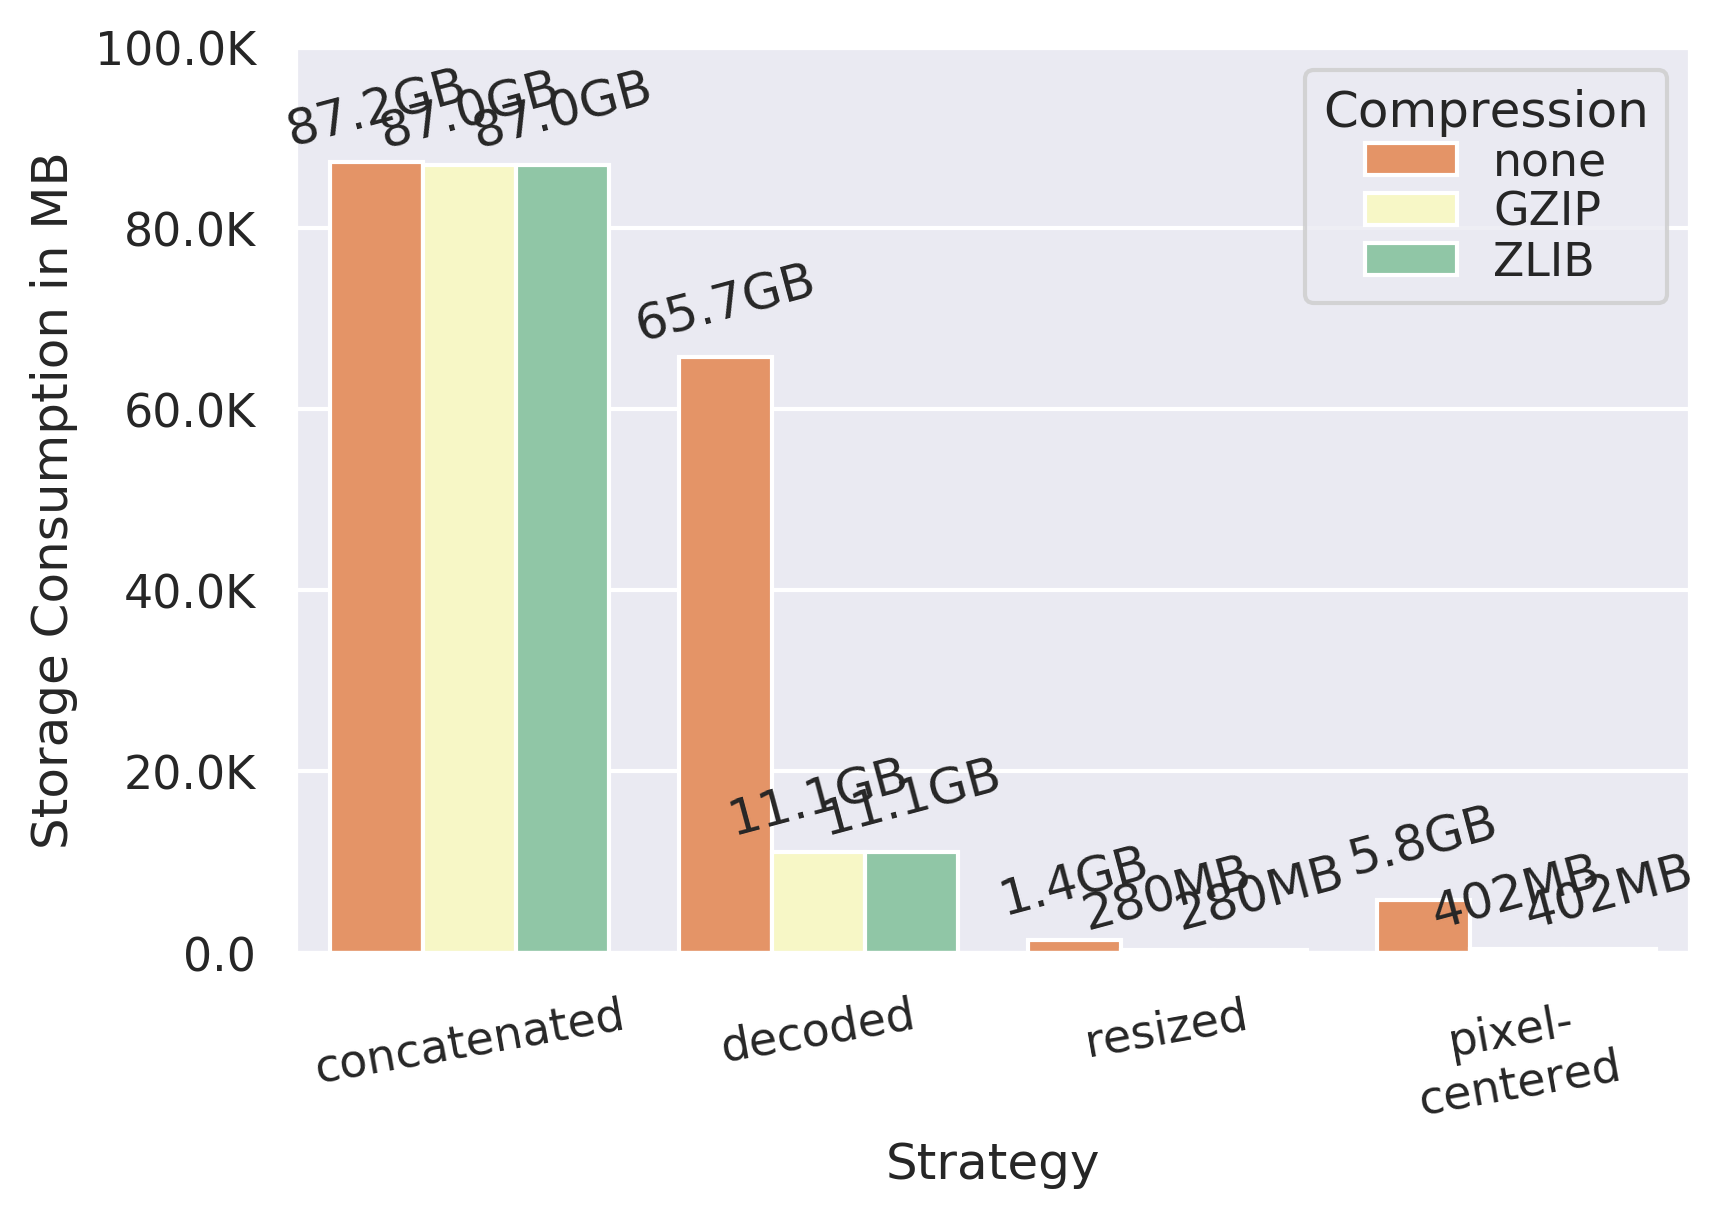

In [8]:
sns.set(palette=compression_palette)

cum_df_temp = cum_df_ord

plot = sns.barplot(
    x="split_name",
    y="shard_cum_size_MB",
    hue="compression_type",
    data=cum_df_temp
)
plot.set_xticklabels(
    strategies_renamed
  , rotation=10
)
plot.set(ylim=(0, 100000))
plot.set(xlabel="Strategy", ylabel="Storage Consumption in MB")
plot.legend(title="Compression", ncol=1, labelspacing=0.1)
plot.yaxis.set_major_formatter(make_big_number_prettier)
show_values_on_bars(plot, h_v="v", space=7000, rotation=15, storage_formatting=True, storage_round=1)
#                    , additional_space=[50000,-50000,0,-50000
#                                       ,0,0,0,0
#                                       ,-50000,-50000,-50000,-50000])

#save_fig("compressed-storage-consumption")

## 3.2 Storage and Throughput for each strategy

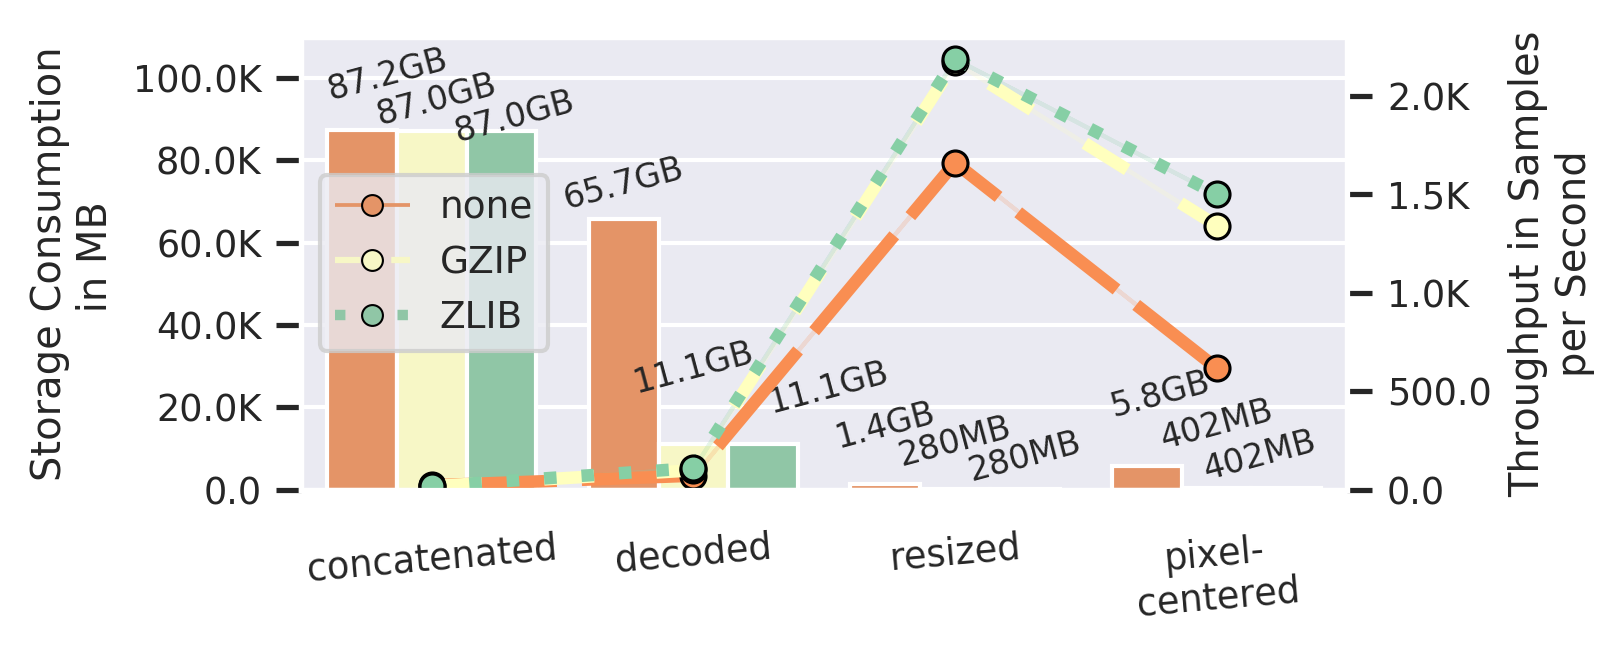

In [14]:
from matplotlib.lines import Line2D

sns.set(palette=compression_palette,font_scale=0.8)
marker = 'o'
linestyle = [(10,2), (4,5), (1,2)]
linestyle2 = [(0,(10,2)), (0,(4,5)), (0,(1,2))]

fig, ax1 = plt.subplots(figsize=(4.5,2))
ax2 = ax1.twinx()

## throughput plot
plot2 = sns.lineplot(
    x="split_name",
    y="throughput_sps",
    hue="compression_type",
    data=cum_df_temp,
    ax=ax2,
    marker=marker,
    size=3,
    sizes=(3,3),
    dashes=linestyle,
    ci=0.95,
    markeredgecolor='black',
    style='compression_type')

plot2.set(ylabel="Throughput in Samples\nper Second")
ax2.grid(False)
legend_elements = [
    Line2D([0], [0], marker=marker, markeredgecolor='#000000', markeredgewidth=0.5, markersize=5, lw=0.9, label='none', color="#E49467", linestyle=linestyle2[0]),
    Line2D([0], [0], marker=marker, markeredgecolor='#000000', markeredgewidth=0.5, markersize=5, lw=1.5, label='GZIP', color="#F7F7C6", linestyle=linestyle2[1]),
    Line2D([0], [0], marker=marker, markeredgecolor='#000000', markeredgewidth=0.5, markersize=5, lw=2.5, label='ZLIB', color="#90C6A6", linestyle=linestyle2[2])]
ax2.legend(handles=legend_elements, loc="center left", prop={'size': 9})
plot2.set(ylim=(0, 2300))          

plot = sns.barplot(
        x="split_name",
        y="shard_cum_size_MB",
        hue="compression_type",
        data=cum_df_temp,
        ax=ax1
    )
plot.set_xticklabels(
    strategies_renamed
  , rotation=5
)
plot.set(ylabel="Storage Consumption\n in MB", xlabel="")
plot.yaxis.set_major_formatter(make_big_number_prettier)
show_values_on_bars(plot, h_v="v", space=10000, rotation=15, storage_formatting=True, storage_round=1, fontsize=8,
                    additional_space=[5000,0,5000,8000
                                     ,-1000,10000,2500,6500
                                     ,-5000,5000,-1000,-1000]
                  , additional_x_space=[0.1,0,0,0.05
                                     ,0.02,0,0,0
                                     ,0.05,0.25,0,-0.1])

plot.set(ylim=(0, 110000))
ax1.get_legend().remove()
plot.yaxis.set_major_formatter(make_big_number_prettier)
plot2.yaxis.set_major_formatter(make_big_number_prettier)
save_fig("compressed-storage-vs-throughput")

## 3.3 Throughput for each compression and each strategy

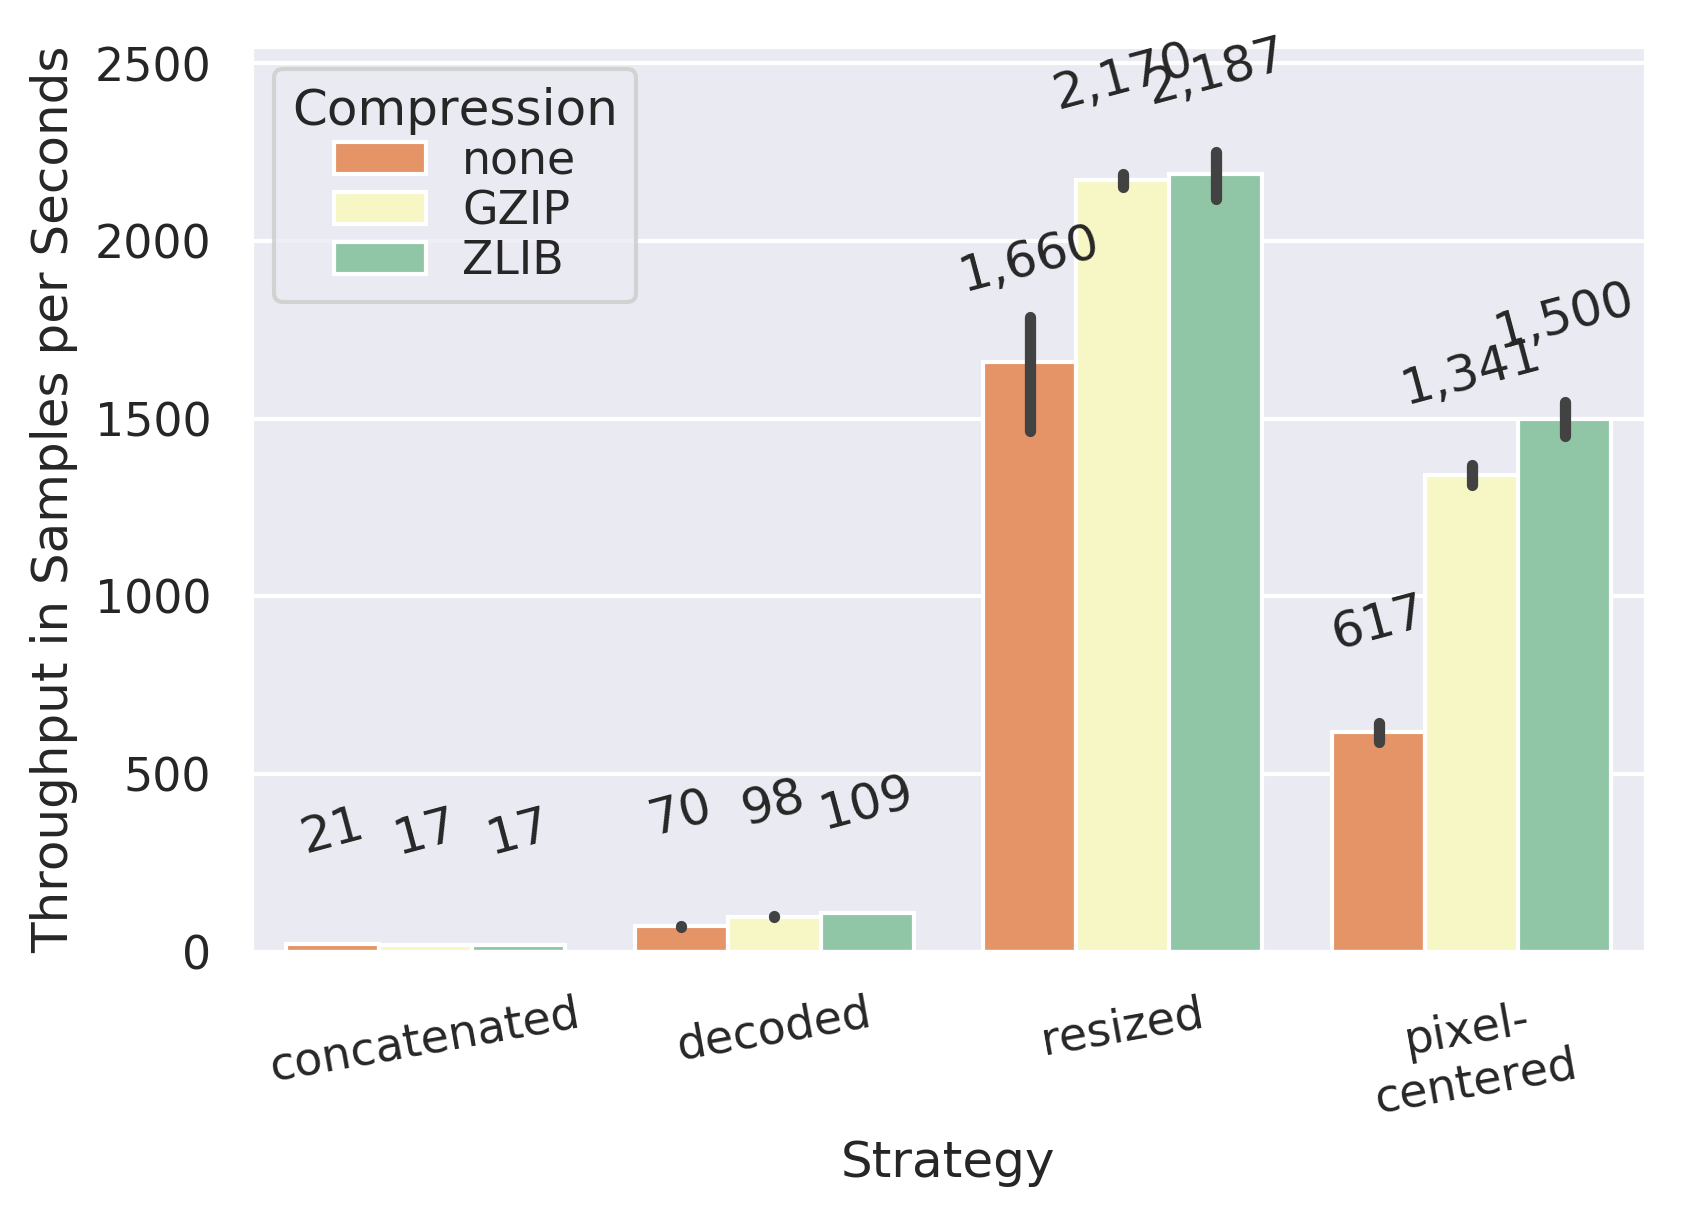

In [10]:
sns.set(palette=compression_palette)

cum_df_temp = cum_df_ord

plot = sns.barplot(
    x="split_name",
    y="throughput_sps",
    hue="compression_type",
    data=cum_df_temp
)
plot.set_xticklabels(
    strategies_renamed
  , rotation=10
)
plot.set(xlabel="Strategy", ylabel="Throughput in Samples per Seconds")
plot.set(ylim=(0, 2550))
plot.legend(title="Compression", ncol=1, labelspacing=0.1, loc="upper left")
show_values_on_bars(plot, h_v="v", space=300, rotation=15)

#save_fig("compression-throughput")

## 3.3 Full Dataset Processing Split

### Normalizing the processing time per samples and renaming the maximum sample count to "full"

In [38]:
# calculate the per sample processing time for both offline and online processing
cum_df_ord["per_sample_online_processing_time_s"] = cum_df_ord["online_processing_time_s"] / cum_df_ord["sample_count"]
cum_df_ord["per_sample_offline_processing_and_save_time_s"] = cum_df_ord["offline_processing_and_save_time_s"] / cum_df_ord["sample_count"]
# calculate the total processing time for each sample count
cum_df_ord["total_processing_time_s"] = cum_df_ord["online_processing_time_s"] + cum_df_ord["offline_processing_and_save_time_s"]
# extrapolate based on the full count of images
cum_df_ord["full_dataset_online_processing_time_s"] = cum_df_ord["per_sample_online_processing_time_s"] * full_dataset_samplecount
cum_df_ord["full_dataset_offline_processing_and_save_time_s"] = cum_df_ord["per_sample_offline_processing_and_save_time_s"] * full_dataset_samplecount
cum_df_ord["full_dataset_offline_processing_and_save_time_m"] = cum_df_ord["full_dataset_offline_processing_and_save_time_s"] / 60
cum_df_ord["full_dataset_offline_processing_and_save_time_h"] = cum_df_ord["full_dataset_offline_processing_and_save_time_m"] / 60

# sum the offline and online time for the full dataset processing time (converted to hours)
cum_df_ord["full_dataset_processing_time_s"] = cum_df_ord["full_dataset_online_processing_time_s"] + cum_df_ord["full_dataset_offline_processing_and_save_time_s"]
cum_df_ord["full_dataset_processing_time_m"] = cum_df_ord["full_dataset_processing_time_s"] / 60
cum_df_ord["full_dataset_processing_time_h"] = cum_df_ord["full_dataset_processing_time_m"] / 60 

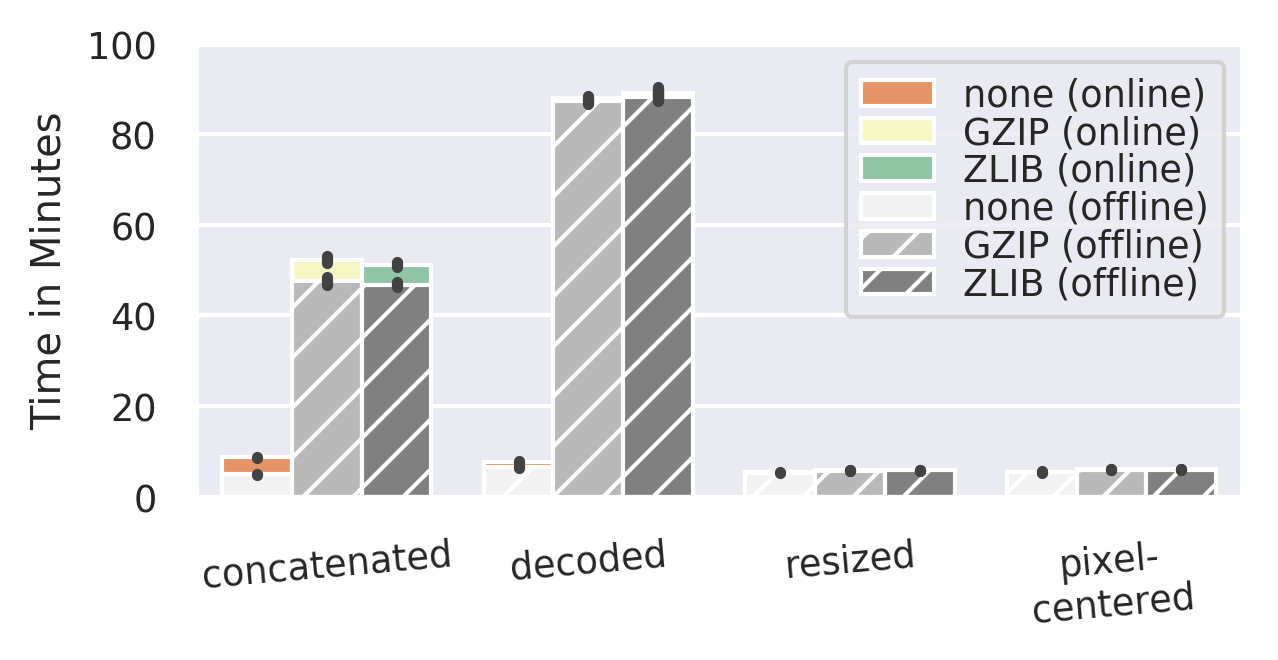

In [41]:
cum_df_temp = cum_df_ord

sns.set(palette=compression_palette, font_scale=0.8)
fig, ax1 = plt.subplots(figsize=(4.5,2))

plot = sns.barplot(
    x="split_name",
    y="full_dataset_processing_time_m",
    hue="compression_type",
    data=cum_df_temp
)
plot = sns.barplot(
    x="split_name",
    y="full_dataset_offline_processing_and_save_time_m",
    hue="compression_type",
    data=cum_df_temp,
    color="grey"
)

plot.set_xticklabels(
    strategies_renamed
  , rotation=5
)

sample_counts = len(cum_df_temp.compression_type.unique())
strategies_count = len(cum_df_temp.split_name.unique())

for i,bar in enumerate(plot.patches):
    if i > (sample_counts * strategies_count):
        bar.set_hatch("//")

plot.set(xlabel="", ylabel="Time in Minutes")
plot.set(ylim=(0, 100))

handles, labels = plot.get_legend_handles_labels()

def add_status_to_handle(handle, index):
    compression_count = 3
    label = handle.get_label()
    if index >= compression_count:
        new_label = label + ' (offline)'
    else:
        new_label = label + ' (online)'
    handle.set_label(new_label)
    
for i, handle in enumerate(handles):
    add_status_to_handle(handle,index=i)

plot.legend(handles=handles, title="", loc="upper right", ncol=1, labelspacing=0.02, columnspacing=0.3)
save_fig("compression-processing-time-split")

# X. Misc Plots and Calculations

## X.1 -

In [7]:
space_dict = {
    "strategy": []
   ,"space_saving_gzip": []
   ,"space_saving_zlib": []
   ,"sps_increase_gzip_fac": []
   ,"sps_increase_zlib_fac": []
   ,"offline_time_factor": []
}

def add_to_dict(strategy, ss_gzip, ss_zlib, sps_gzip, sps_zlib, offline_time_factor):
    space_dict["strategy"].append(strategy)
    space_dict["space_saving_gzip"].append(ss_gzip)
    space_dict["space_saving_zlib"].append(ss_zlib)
    space_dict["sps_increase_gzip_fac"].append(sps_gzip)
    space_dict["sps_increase_zlib_fac"].append(sps_zlib)
    space_dict["offline_time_factor"].append(offline_time_factor)
    
    
def space_saving(compressed, original):
    return round((1 - (compressed / original)) * 100, 2)

def throughput_increase(compressed, original):
    return round(compressed / original, 2)
    
for split_name in cum_df.split_name.unique():
    
    temp_df = cum_df.query(f"split_name=='{split_name}'")
    original_size = temp_df.query("compression_type=='none'").mean()["shard_cum_size_MB"]
    original_sps = temp_df.query("compression_type=='none'").mean()["throughput_sps"]
    original_offline = temp_df.query("compression_type=='none'").mean()["offline_processing_and_save_time_s"]

    gzip_size = temp_df.query("compression_type=='GZIP'").mean()["shard_cum_size_MB"]
    gzip_sps = temp_df.query("compression_type=='GZIP'").mean()["throughput_sps"]
    gzip_offline = temp_df.query("compression_type=='GZIP'").mean()["offline_processing_and_save_time_s"]
    
    zlib_size = temp_df.query("compression_type=='ZLIB'").mean()["shard_cum_size_MB"]
    zlib_sps = temp_df.query("compression_type=='ZLIB'").mean()["throughput_sps"]

    print(f"Strategy: {split_name}")
    print(f"- Orig: {round(original_size, 2)}MB")
    print(f"- Orig: {round(original_sps, 2)}sps")
    print(f"- GZIP: {round(gzip_size, 2)}MB")
    print(f"- GZIP: {round(gzip_sps, 2)}sps")
    print(f"- ZLIB: {round(zlib_size, 2)}MB")    
    print(f"- ZLIB: {round(zlib_sps, 2)}sps")
    add_to_dict(strategy = split_name
               ,ss_gzip = space_saving(compressed = gzip_size, original = original_size)
               ,ss_zlib = space_saving(compressed = zlib_size, original = original_size)
               ,sps_gzip = throughput_increase(compressed = gzip_sps, original = original_sps)
               ,sps_zlib = throughput_increase(compressed = zlib_sps, original = original_sps)
               ,offline_time_factor = round((gzip_offline / original_offline), 2) )
    
pd.DataFrame(space_dict)    

Strategy: 2-read-image
- Orig: 87215.36MB
- Orig: 21.89sps
- GZIP: 86975.39MB
- GZIP: 17.42sps
- ZLIB: 86975.39MB
- ZLIB: 17.8sps
Strategy: 3-decode-image
- Orig: 65706.92MB
- Orig: 70.86sps
- GZIP: 11106.41MB
- GZIP: 98.35sps
- ZLIB: 11106.39MB
- ZLIB: 109.49sps
Strategy: 4-resize-image
- Orig: 1442.43MB
- Orig: 1660.01sps
- GZIP: 280.51MB
- GZIP: 2170.94sps
- ZLIB: 280.52MB
- ZLIB: 2187.48sps
Strategy: 5-center-pixel-values
- Orig: 5768.79MB
- Orig: 617.66sps
- GZIP: 402.66MB
- GZIP: 1341.19sps
- ZLIB: 402.67MB
- ZLIB: 1500.26sps


,strategy,space_saving_gzip,space_saving_zlib,sps_increase_gzip_fac,sps_increase_zlib_fac,offline_time_factor
0,2-read-image,0.28,0.28,0.80,0.81,9.65
1,3-decode-image,83.10,83.10,1.39,1.55,13.48
2,4-resize-image,80.55,80.55,1.31,1.32,1.08
3,5-center-pixel-values,93.02,93.02,2.17,2.43,1.10


## X.2 Warning - Creating the plots based on `dstat` logs can take several hours

In [104]:
cum_dstat_df_copy = cum_dstat_df.copy(deep=True)
cum_dstat_df_copy["sample_count"] = cum_dstat_df_copy.sample_count.astype('category')
cum_dstat_df_copy["split_name"] = cum_dstat_df_copy.split_name.astype('category')
cum_dstat_df_copy["run"] = cum_dstat_df_copy.run.astype('category')
cum_dstat_df_copy["thread_count"] = cum_dstat_df_copy.thread_count.astype('category')
strategy_list = list(cum_dstat_df_copy.split_name.unique())
strategy_list

['2-read-image', '3-decode-image', '4-resize-image', '5-center-pixel-values']

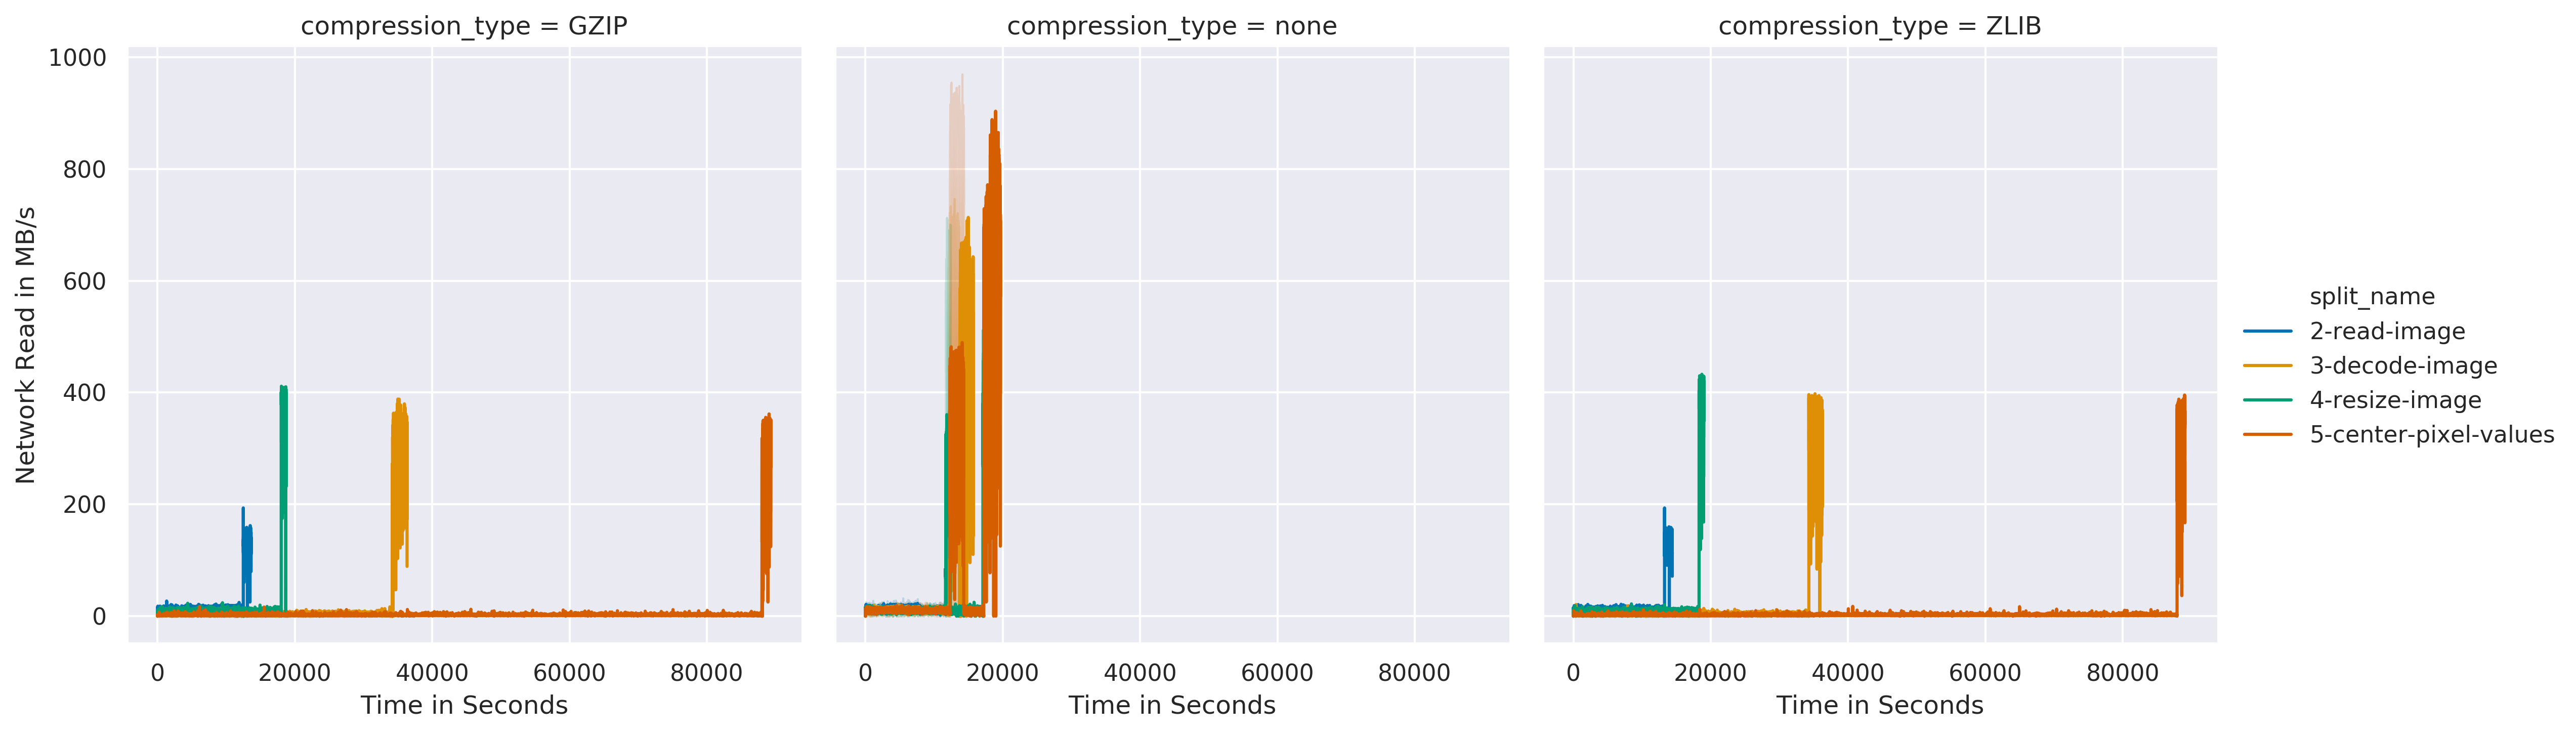

In [105]:
sns.set(palette=default_palette)

cum_dstat_df_temp = cum_dstat_df_copy

plot = sns.relplot(
    x="rel_time_s",
    y="net_read_mbs",
    hue="split_name",
    col="compression_type",
    kind="line",
    data=cum_dstat_df_temp,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Network Read in MB/s")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")

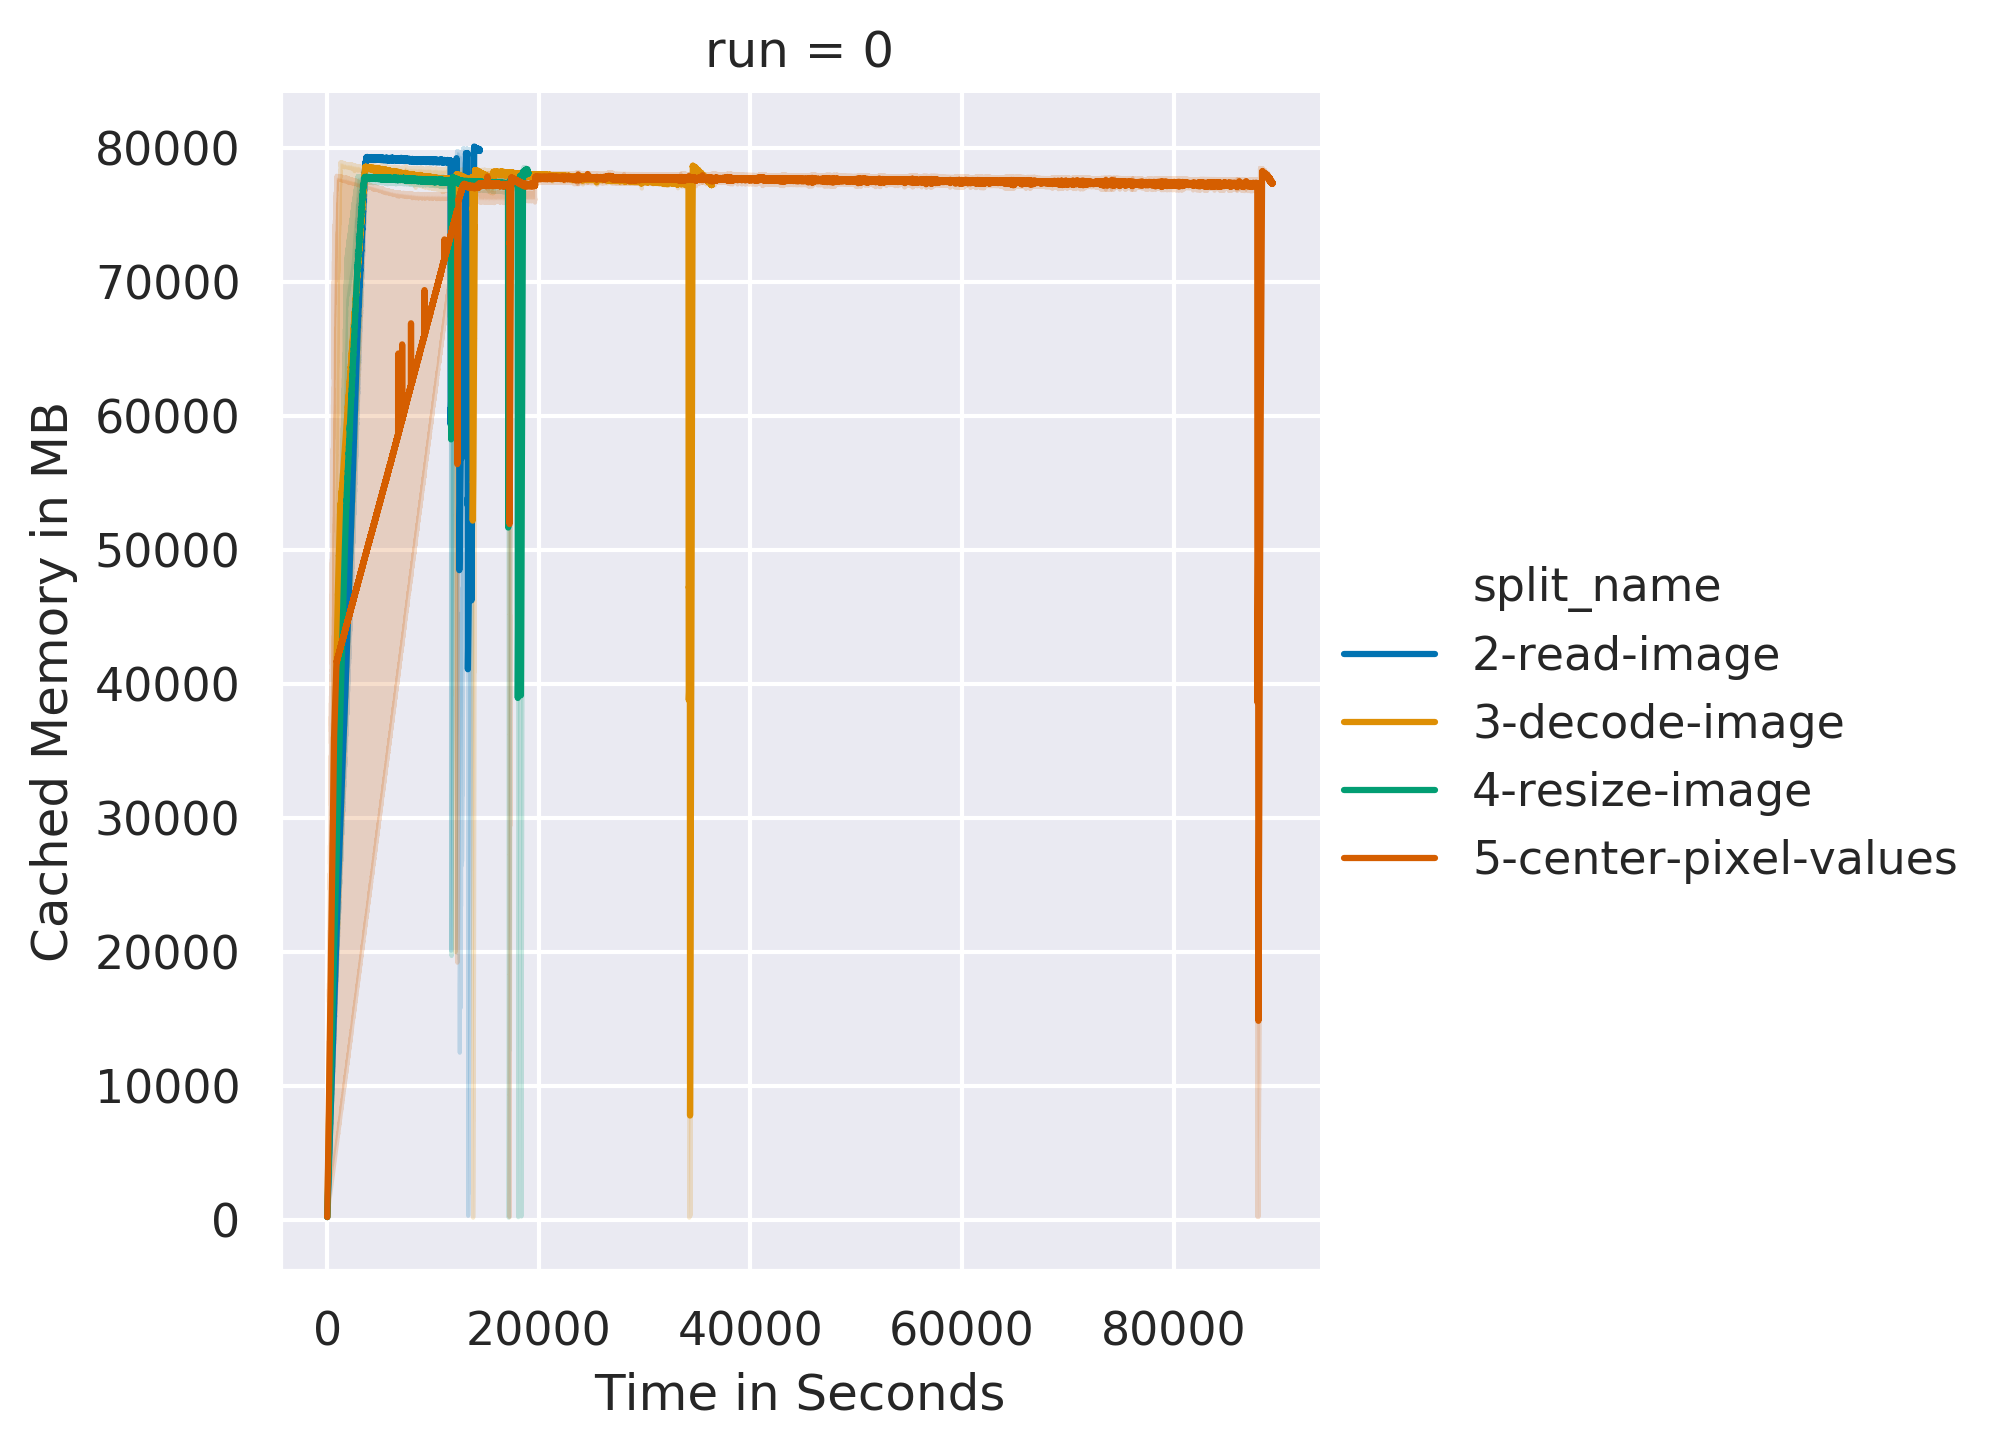

In [106]:
sns.set(palette=default_palette)

cum_dstat_df_temp = cum_dstat_df_copy

plot = sns.relplot(
    x="rel_time_s",
    y="memory_cached_mb",
    hue="split_name",
    col="run",
    kind="line",
    data=cum_dstat_df_temp,
    ci=95
)
plot.set(xlabel="Time in Seconds", ylabel="Cached Memory in MB")
#plot.set(ylim=(0, 1200))
#plot.axhline(1100, color="black")
#plot.legend(strategies_renamed, title="Strategy", loc="upper right", ncol=1,labelspacing=0.10)
#save_fig("network-read-speed-t8-full", file_type="png")